In [141]:
!pip install rouge_score
!pip install datasets transformers
!pip install accelerate -U
!pip install transformers[torch]

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [2]:
!git clone https://github.com/ryanzhumich/AESLC

Cloning into 'AESLC'...
remote: Enumerating objects: 17469, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 17469 (delta 1), reused 0 (delta 0), pack-reused 17461
Receiving objects: 100% (17469/17469), 7.36 MiB | 20.42 MiB/s, done.
Resolving deltas: 100% (48/48), done.


In [142]:
import re
import os
import pandas as pd

In [143]:
def get_file_data(file_path):
    with open(file_path, 'r') as file:
        content = file.read()
    
    email_body_text, subject_line = content.split('@subject\n', 1)
    email_body = re.sub(r'\s+', ' ', re.sub(r'[^\w\s]', '', email_body_text).strip())
    
    if 'train' in file_path:
        subject_line = subject_line.strip()
        return {
            'email_body': email_body,
            'subject_line': subject_line
        }
    else:
        subjects = subject_line.replace("@ann0", "@subject\n").replace("@ann1", "@subject\n").replace("@ann2", "@subject\n")
        subject_0, subject_1, subject_2, subject_3 = subjects.split("@subject")
        return {
            'email_body': email_body,
            'subject_line': subject_0.strip(),
            'subject_line1': subject_1.strip(),
            'subject_line2': subject_2.strip(),
            'subject_line3': subject_3.strip()
        }

In [144]:
def get_floder_data_as_df(folder_path):
    data = []
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        if os.path.isfile(file_path):
            result = get_file_data(file_path)
            result['filename'] = filename
            data.append(result)
    
    # Determine columns based on folder type
    if 'train' in folder_path:
        columns = ['filename', 'email_body', 'subject_line']
    else:
        columns = ['filename', 'email_body', 'subject_line', 'subject_line1', 'subject_line2', 'subject_line3']
    
    df = pd.DataFrame(data, columns=columns)
    return df

In [145]:
train_data = get_floder_data_as_df('AESLC/enron_subject_line/train')

In [146]:
dev_data = get_floder_data_as_df('AESLC/enron_subject_line/dev')

In [147]:
test_data = get_floder_data_as_df('AESLC/enron_subject_line/test')

In [148]:
train_data.head(10)

,filename,email_body,subject_line
0,delainey-d_sent_201.subject,Ken I have taken a look at the material you ha...,ARC
1,sager-e_inbox_125.subject,Subject 11 Importance High You have got to rea...,this is way funny
2,lokey-t_inbox_875.subject,Bankruptcy 101 In an effort to educate employe...,Bankruptcy 101 - Sign up now!
3,stepenovitch-j_inbox_159.subject,Welcome to eMail News Delivery a service from ...,French Chemical and Explosives Producer Create...
4,may-l_inbox_12.subject,The information contained herein is based on s...,API 2/5
5,nemec-g_sent_2331.subject,Have you guys received any information from Gu...,Gulf Power Construction Progress
6,mann-k_sent_1583.subject,Dear Turbine Torture Club Members The purpose ...,Weekly GE Conference Call
7,farmer-d_sent_217.subject,I recevied a note from Janet Wallis stating th...,Southern Union @ Mtr 8663
8,gang-l_inbox_6.subject,Hello For my own use I put together the attach...,Outstanding DMS requests - week ending June 21
9,keiser-k_inbox_332.subject,Scott Please verify this trader product matrix...,EOL products and traders


In [149]:
dev_data.head()

,filename,email_body,subject_line,subject_line1,subject_line2,subject_line3
0,nemec-g_inbox_2.subject,By this email I am requesting that my assistan...,Texaco arbitration,set up telephonic meeting on texaco arbitration,meeting request,meeting: texaco answer review
1,parks-j_inbox_727.subject,Houston Astros Baseball season tickets are ava...,Astros Baseball Tickets,enron employee tickets - houston astros,enron's astro's 2002 home games season tickets...,houston astros season tickets available
2,jones-t_sent_5410.subject,I am being told that FirstEnergy Services Corp...,Merger Documentation-First Energy,firstenergy services successor to first energy...,documentation needed,do you have documentation on the merger?
3,symes-k_sent_941.subject,Greetings from the land of wateryeyed flatasse...,bananas and other things you can call me with,life at enron,update,checking in with you
4,kitchen-l_inbox_104.subject,Louise I never thanked you for looking out for...,Restricted Stock,thank you louise,my thanks,thank you & merry christmas


In [150]:
dev_data.shape

(1960, 6)

In [181]:
test_data.head()

,filename,email_body,subject_line,subject_line1,subject_line2,subject_line3
0,dasovich-j_inbox_532.subject,You have received this message because someone...,An Inbound Message For You Has Been Quarantined,e-mail from outside of enron,quarantined e-mail: attachment not allowed,unknown email denied by enron account
1,sager-e_sent_854.subject,Attached is a memo from Julia about a meeting ...,Finance meeting on structured deals,meeting memo,luncheon meeting,meeting going over some of the deals
2,haedicke-m_inbox_154.subject,Could I ask the two of you to please insure th...,East Coast Power,changes to proposal this morning,legal risks on east coast power case,risk review update
3,mcconnell-m_sent_823.subject,John Jeff and I had many excellent meetings wi...,Crude and products business plan,future business plan issues,meeting follow-up notes,meetings run down
4,king-j_inbox_26.subject,Good morning to you Sonny P said they were in ...,neighbors,reservations to huntsville state park,sonny in houston / quick note,family thanksgiving day arrangements


In [182]:
 result = get_file_data('AESLC/enron_subject_line/dev/delainey-d_sent_184.subject')

In [183]:
result

{'email_body': 'Guys anything you can do to encourage your employees to take a little time to participate in the survey would be much appreciated This is a valuable exercise for the company Regards',
 'subject_line': 'The Pulse Survey Results (End of Business - October 19)',
 'subject_line1': 'please encourage employees to take the survey',
 'subject_line2': 'encourage your employees to take part',
 'subject_line3': 'encouragement for survey'}

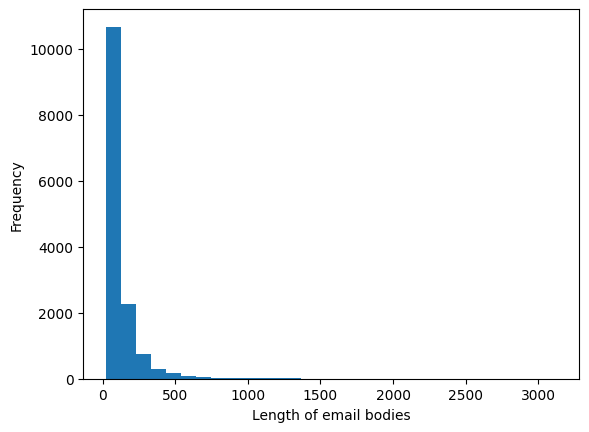

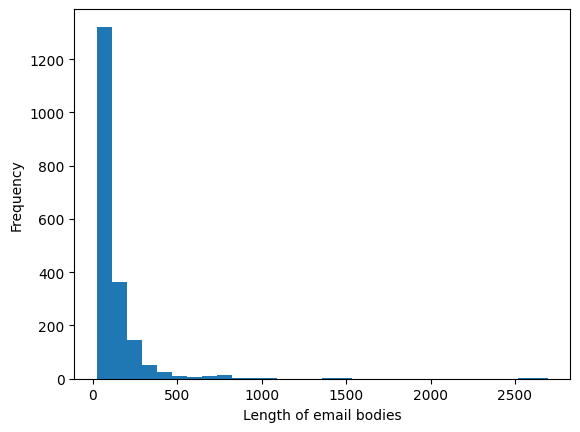

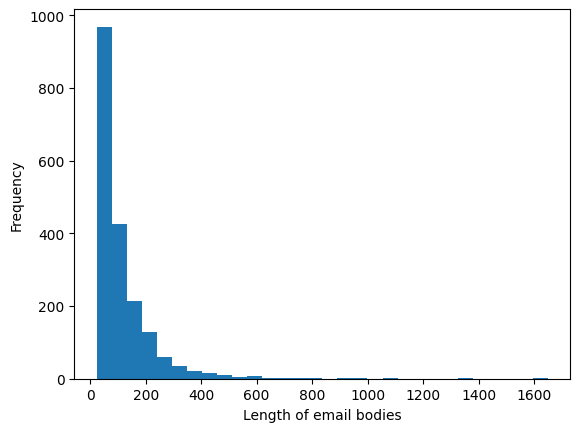

In [184]:
import matplotlib.pyplot as plt

def plot_data(data):
    lengths = [len(text.split()) for text in data['email_body']]
    plt.hist(lengths, bins=30)
    plt.xlabel('Length of email bodies')
    plt.ylabel('Frequency')
    plt.show()

plot_data(train_data)
plot_data(dev_data)
plot_data(test_data)

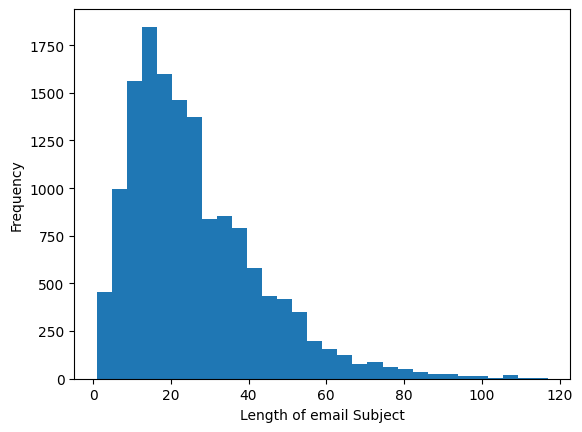

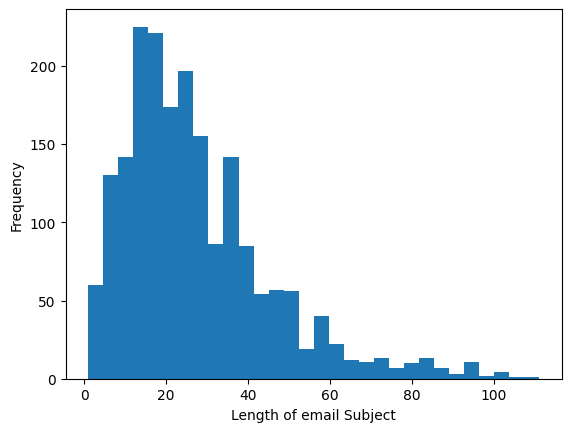

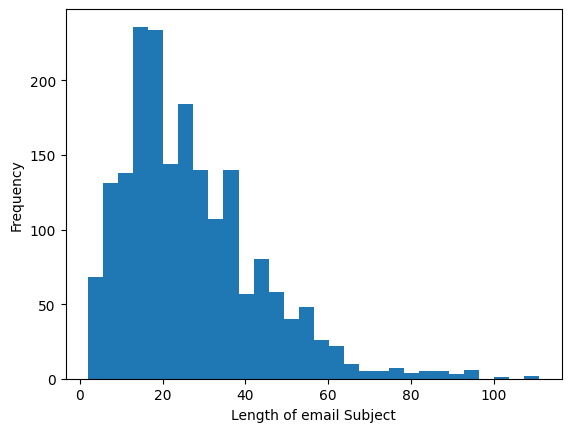

In [186]:
import matplotlib.pyplot as plt

def plot_data(data):
    lengths = [len(subject) for subject in data['subject_line']]
    plt.hist(lengths, bins=30)
    plt.xlabel('Length of email Subject')
    plt.ylabel('Frequency')
    plt.show()

plot_data(train_data)
plot_data(dev_data)
plot_data(test_data)

In [187]:
def save_dataframe_to_csv(df, file_name):
    df.to_csv(file_name, index=False)

In [188]:
# Example usage
save_dataframe_to_csv(train_data, 'train.csv')

save_dataframe_to_csv(dev_data, 'dev.csv')

save_dataframe_to_csv(test_data, 'test.csv')

In [189]:
def remove_filename_column(df):
    if 'filename' in df.columns:
        df = df.drop(columns=['filename'])
    return df

In [190]:
train_data.columns

Index(['filename', 'email_body', 'subject_line'], dtype='object')

In [191]:
train_df = remove_filename_column(train_data)

In [161]:
train_df.head()

,email_body,subject_line
0,Ken I have taken a look at the material you ha...,ARC
1,Subject 11 Importance High You have got to rea...,this is way funny
2,Bankruptcy 101 In an effort to educate employe...,Bankruptcy 101 - Sign up now!
3,Welcome to eMail News Delivery a service from ...,French Chemical and Explosives Producer Create...
4,The information contained herein is based on s...,API 2/5


In [192]:
train_df.shape

(14436, 2)

In [193]:
dev_df = remove_filename_column(dev_data)

In [194]:
dev_df.head()

,email_body,subject_line,subject_line1,subject_line2,subject_line3
0,By this email I am requesting that my assistan...,Texaco arbitration,set up telephonic meeting on texaco arbitration,meeting request,meeting: texaco answer review
1,Houston Astros Baseball season tickets are ava...,Astros Baseball Tickets,enron employee tickets - houston astros,enron's astro's 2002 home games season tickets...,houston astros season tickets available
2,I am being told that FirstEnergy Services Corp...,Merger Documentation-First Energy,firstenergy services successor to first energy...,documentation needed,do you have documentation on the merger?
3,Greetings from the land of wateryeyed flatasse...,bananas and other things you can call me with,life at enron,update,checking in with you
4,Louise I never thanked you for looking out for...,Restricted Stock,thank you louise,my thanks,thank you & merry christmas


In [195]:
dev_df.shape

(1960, 5)

In [196]:
id = 2
print("\n", dev_df["email_body"].iloc[id])
print("\n", dev_df["subject_line"].iloc[id])
print("\n", dev_df["subject_line1"].iloc[id])
print("\n", dev_df["subject_line2"].iloc[id])
print("\n", dev_df["subject_line3"].iloc[id])


 I am being told that FirstEnergy Services Corp is the successor by merger to First Energy Trading Services Inc I do not have any documentation reflecting this merger Do you

 Merger Documentation-First Energy

 firstenergy services successor to first energy trading?

 documentation needed

 do you have documentation on the merger?


In [197]:
test_df = remove_filename_column(test_data)

In [198]:
test_df.head()

,email_body,subject_line,subject_line1,subject_line2,subject_line3
0,You have received this message because someone...,An Inbound Message For You Has Been Quarantined,e-mail from outside of enron,quarantined e-mail: attachment not allowed,unknown email denied by enron account
1,Attached is a memo from Julia about a meeting ...,Finance meeting on structured deals,meeting memo,luncheon meeting,meeting going over some of the deals
2,Could I ask the two of you to please insure th...,East Coast Power,changes to proposal this morning,legal risks on east coast power case,risk review update
3,John Jeff and I had many excellent meetings wi...,Crude and products business plan,future business plan issues,meeting follow-up notes,meetings run down
4,Good morning to you Sonny P said they were in ...,neighbors,reservations to huntsville state park,sonny in houston / quick note,family thanksgiving day arrangements


In [199]:
test_df.shape

(1906, 5)

In [200]:
from datasets import Dataset, DatasetDict

In [201]:
train_dataset = Dataset.from_pandas(train_df)

In [202]:
dev_dataset = Dataset.from_pandas(dev_df)

In [203]:
test_dataset = Dataset.from_pandas(test_df)

In [204]:
dataset_dict = DatasetDict({
    'train': train_dataset,
    'dev': dev_dataset,
    'test': test_dataset
})

In [205]:
dataset_dict

DatasetDict({
    train: Dataset({
        features: ['email_body', 'subject_line'],
        num_rows: 14436
    })
    dev: Dataset({
        features: ['email_body', 'subject_line', 'subject_line1', 'subject_line2', 'subject_line3'],
        num_rows: 1960
    })
    test: Dataset({
        features: ['email_body', 'subject_line', 'subject_line1', 'subject_line2', 'subject_line3'],
        num_rows: 1906
    })
})

In [206]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

In [207]:
model_name = "facebook/bart-large-cnn"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

In [208]:
import torch

In [209]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

BartForConditionalGeneration(
  (model): BartModel(
    (shared): Embedding(50264, 1024, padding_idx=1)
    (encoder): BartEncoder(
      (embed_tokens): BartScaledWordEmbedding(50264, 1024, padding_idx=1)
      (embed_positions): BartLearnedPositionalEmbedding(1026, 1024)
      (layers): ModuleList(
        (0-11): 12 x BartEncoderLayer(
          (self_attn): BartSdpaAttention(
            (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
          )
          (self_attn_layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (activation_fn): GELUActivation()
          (fc1): Linear(in_features=1024, out_features=4096, bias=True)
          (fc2): Linear(in_features=4096, out_features=1024, bias=True)
          (final_l

In [210]:
from transformers import pipeline

In [211]:
pipe = pipeline("summarization", model="facebook/bart-large-cnn")

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [103]:
# Example usage
def summarize_email(df, index):
    email_body = df['email_body'].iloc[index]
    subject_line = df['subject_line'].iloc[index]

    # Summarize the email body
    summary = test_model(email_body, pipe)

    print("Email Body:", email_body)
    print("\n")
    print("Subject Line:", subject_line)
    print("\n")
    print("Generated Summary:", summary)

In [212]:
def test_model(email_body, pipeline, min_length=3, length_penalty=2.0, num_beams=4):
    # Tokenize the input text
    input_tokens = pipeline.tokenizer(email_body, return_tensors='pt')
    input_length = input_tokens['input_ids'].shape[1]

    # Adjust max_length to be a certain percentage of the input length
    adjusted_max_length = max(min_length + 10, int(input_length * 0.6))  # Ensure a minimum length

    # Generate summary with dynamic max_length
    gen_kwargs = {
        "length_penalty": length_penalty,
        "num_beams": num_beams,
        "max_length": adjusted_max_length,
        "min_length": min_length
    }

    summary = pipeline(email_body, **gen_kwargs)[0]['summary_text']
    return summary

In [213]:
# Summarize the email body at index 0
summarize_email(test_df, 0)

Email Body: You have received this message because someone has attempted to send you an email from outside of Enron with an attachment type that Enron does not allow into our messaging environment Your email has been quarantined and is being held at the MailSweeper server Sender sloggansahmassoccom


Subject Line: An Inbound Message For You Has Been Quarantined


Generated Summary: Your email has been quarantined and is being held at the MailSweeper server Sender sloggansahmassoccom.


In [219]:
# Summarize the email body at index 0
summarize_email(test_df, 1)

Email Body: Attached is a memo from Julia about a meeting going over some of the deals including power deals that were closed last year Background information on the deals could be helpful as several of these deals are likely to be administered by power trading Let LindaNoske know if you can make it lunch will be served


Subject Line: Finance meeting on structured deals


Generated Summary: LindaNoske will be hosting a meeting to go over some of the power deals that were closed last year. If you can make it lunch will be served.


In [215]:
custom_model_name = "kkasiviswanath/bart_email_subject_summarizer"
custom_tokenizer = AutoTokenizer.from_pretrained(model_name)
custom_model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

In [217]:
custom_pipe = pipeline("summarization", model=custom_model_name)


# Example usage
def custom_summarize_email(df, index):
    email_body = df['email_body'].iloc[index]
    subject_line = df['subject_line'].iloc[index]

    # Summarize the email body
    summary = test_model(email_body, custom_pipe)

    print("Email Body:", email_body)
    print("\n")
    print("Subject Line:", subject_line)
    print("\n")
    print("Generated Summary:", summary)

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [218]:
custom_summarize_email(test_df, 0)

Email Body: You have received this message because someone has attempted to send you an email from outside of Enron with an attachment type that Enron does not allow into our messaging environment Your email has been quarantined and is being held at the MailSweeper server Sender sloggansahmassoccom


Subject Line: An Inbound Message For You Has Been Quarantined


Generated Summary: Your email has been quarantined and is being held at the MailSweeper server Sender sloggansahmassoccom.


In [220]:
def get_feature(batch, max_length: int = 1024):
    encodings = tokenizer(
        batch['email_body'], 
        text_target=batch['subject_line'], 
        max_length=max_length, 
        truncation=True
    )

    return {
        'input_ids': encodings['input_ids'],
        'attention_mask': encodings['attention_mask'],
        'labels': encodings['labels']
    }


In [221]:
dataset_dict

DatasetDict({
    train: Dataset({
        features: ['email_body', 'subject_line'],
        num_rows: 14436
    })
    dev: Dataset({
        features: ['email_body', 'subject_line', 'subject_line1', 'subject_line2', 'subject_line3'],
        num_rows: 1960
    })
    test: Dataset({
        features: ['email_body', 'subject_line', 'subject_line1', 'subject_line2', 'subject_line3'],
        num_rows: 1906
    })
})

In [222]:
dataset_pt = dataset_dict.map(get_feature, batched=True)

Map:   0%|          | 0/14436 [00:00<?, ? examples/s]

Map:   0%|          | 0/1960 [00:00<?, ? examples/s]

Map:   0%|          | 0/1906 [00:00<?, ? examples/s]

In [223]:
dataset_pt

DatasetDict({
    train: Dataset({
        features: ['email_body', 'subject_line', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 14436
    })
    dev: Dataset({
        features: ['email_body', 'subject_line', 'subject_line1', 'subject_line2', 'subject_line3', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 1960
    })
    test: Dataset({
        features: ['email_body', 'subject_line', 'subject_line1', 'subject_line2', 'subject_line3', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 1906
    })
})

In [224]:
columns = ['input_ids', 'labels', 'attention_mask']
dataset_pt.set_format(type='torch', columns=columns)

In [225]:
from transformers import DataCollatorForSeq2Seq

data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

In [226]:
train_test_split = dataset_pt['train'].train_test_split(test_size=0.2)

In [227]:
train_test_split

DatasetDict({
    train: Dataset({
        features: ['email_body', 'subject_line', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 11548
    })
    test: Dataset({
        features: ['email_body', 'subject_line', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 2888
    })
})

In [228]:
dataset_dict['train'] = train_test_split['train']
dataset_dict['eval'] = train_test_split['test']

In [229]:
import accelerate
from transformers import TrainingArguments, Trainer

In [230]:
training_args = TrainingArguments(
    output_dir = 'bart_summarizer',
    num_train_epochs = 5,
    per_device_train_batch_size = 4,
    per_device_eval_batch_size = 4,
    warmup_steps = 500,
    weight_decay = 0.01,
    logging_steps = 10,
    eval_strategy = 'steps',
    eval_steps = 500,
    save_steps = 5e5,
    report_to = 'none',
    learning_rate = 1e-5
)

In [231]:
trainer = Trainer(
    model = model,
    args = training_args,
    tokenizer = tokenizer,
    train_dataset = dataset_dict['train'],
    eval_dataset = dataset_dict['eval'],
    data_collator = data_collator
)

In [232]:
trainer.train()

/opt/conda/lib/python3.10/site-packages/transformers/data/data_collator.py:656: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /usr/local/src/pytorch/torch/csrc/utils/tensor_new.cpp:261.)
  batch["labels"] = torch.tensor(batch["labels"], dtype=torch.int64)


Step,Training Loss,Validation Loss
500,2.860400,3.126819
1000,2.709500,2.954450
1500,2.825800,2.912150
2000,2.923600,2.880192
2500,2.933300,2.823426
3000,1.687400,2.824628
3500,2.112700,2.813528
4000,2.338800,2.791183
4500,1.818500,2.821522
5000,2.161500,2.818799


Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 142, 'min_length': 56, 'early_stopping': True, 'num_beams': 4, 'length_penalty': 2.0, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


TrainOutput(global_step=14435, training_loss=1.6911163657439139, metrics={'train_runtime': 6549.6475, 'train_samples_per_second': 8.816, 'train_steps_per_second': 2.204, 'total_flos': 3.3140421732040704e+16, 'train_loss': 1.6911163657439139, 'epoch': 5.0})

In [233]:
model.save_pretrained("bart_email_subject_text_summarizer")
tokenizer.save_pretrained("bart_email_subject_text_summarizer")

Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 142, 'min_length': 56, 'early_stopping': True, 'num_beams': 4, 'length_penalty': 2.0, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


('bart_email_subject_text_summarizer/tokenizer_config.json',
 'bart_email_subject_text_summarizer/special_tokens_map.json',
 'bart_email_subject_text_summarizer/vocab.json',
 'bart_email_subject_text_summarizer/merges.txt',
 'bart_email_subject_text_summarizer/added_tokens.json',
 'bart_email_subject_text_summarizer/tokenizer.json')

In [234]:
repo_name="bart_email_subject_text_summarizer"

model.push_to_hub(repo_name)
tokenizer.push_to_hub(repo_name)

Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 142, 'min_length': 56, 'early_stopping': True, 'num_beams': 4, 'length_penalty': 2.0, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

README.md:   0%|          | 0.00/5.17k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/kkasiviswanath/bart_email_subject_text_summarizer/commit/2b6d08527b101d84de40c1b697a5ea9e8eb42e40', commit_message='Upload tokenizer', commit_description='', oid='2b6d08527b101d84de40c1b697a5ea9e8eb42e40', pr_url=None, pr_revision=None, pr_num=None)

In [235]:
!zip -r bart_email_subject_text_summarizer.zip -r   bart_email_subject_text_summarizer

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  adding: bart_email_subject_text_summarizer/ (stored 0%)
  adding: bart_email_subject_text_summarizer/merges.txt (deflated 53%)
  adding: bart_email_subject_text_summarizer/generation_config.json (deflated 47%)
  adding: bart_email_subject_text_summarizer/tokenizer.json (deflated 72%)
  adding: bart_email_subject_text_summarizer/README.md (deflated 66%)
  adding: bart_email_subject_text_summarizer/vocab.json (deflated 59%)
  adding: bart_email_subject_text_summarizer/tokenizer_config.json (deflated 75%)
  adding: bart_email_subject_text_summarizer/special_tokens_map.json (deflated 52%)
  adding: bart_email_subject_text_summarizer/model.safetensors (deflated 7%)
  adding: bart_email_subject_text_summarizer/config.json (deflated 61%)


In [2]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
from transformers import pipeline

2024-07-23 16:14:04.180722: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-23 16:14:04.180836: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-23 16:14:04.338722: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
model_name = "bart_email_subject_text_summarizer"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

In [238]:
pre_trained_model_pipe = pipeline("summarization", model="bart_email_subject_text_summarizer")

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [5]:
# Example usage
def summarize_email(df, index):
    email_body = df['email_body'].iloc[index]
    subject_line = df['subject_line'].iloc[index]

    # Summarize the email body
    summary = test_model(email_body, pre_trained_model_pipe)

    print("Email Body:", email_body)
    print("\n")
    print("Subject Line:", subject_line)
    print("\n")
    print("Generated Summary:", summary)

In [240]:
summarize_email(test_df, 1)

Email Body: Attached is a memo from Julia about a meeting going over some of the deals including power deals that were closed last year Background information on the deals could be helpful as several of these deals are likely to be administered by power trading Let LindaNoske know if you can make it lunch will be served


Subject Line: Finance meeting on structured deals


Generated Summary: Meeting to Discuss Power Trading Deals


In [6]:
custom_model_name = "kkasiviswanath/bart_email_subject_text_summarizer"
custom_tokenizer = AutoTokenizer.from_pretrained(model_name)
custom_model = AutoModelForSeq2SeqLM.from_pretrained(model_name)
custom_pipe = pipeline("summarization", model=custom_model_name)


# Example usage
def custom_summarize_email(df, index):
    email_body = df['email_body'].iloc[index]
    subject_line = df['subject_line'].iloc[index]

    # Summarize the email body
    summary = test_model(email_body, custom_pipe)

    print("Email Body:", email_body)
    print("\n")
    print("Subject Line:", subject_line)
    print("\n")
    print("Generated Summary:", summary)
    
    custom_summarize_email(test_df, 1)

config.json:   0%|          | 0.00/1.66k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/358 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.24k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/279 [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [46]:
complete_test_data = test_data

In [70]:
pred_data = test_data.head(10)

# Example to verify the new DataFrame length
print(f"Original DataFrame length: {len(test_data)}")
print(f"New DataFrame length: {len(pred_data)}")

Original DataFrame length: 1906
New DataFrame length: 10


In [50]:
# Generate subject lines for the test set
def generate_subject_line(email_body):
    inputs = tokenizer("generate subject line: " + email_body, return_tensors="pt", max_length=512, truncation=True)
    # Move inputs to the GPU if available
    inputs = {k: v.to(model.device) for k, v in inputs.items()}
    # Access input_ids from the dictionary
    outputs = model.generate(inputs['input_ids'], max_length=128, num_beams=4, early_stopping=True)
    return tokenizer.decode(outputs[0], skip_special_tokens=True)

In [48]:
sample_email = "To confirm:  Mark Thomas Mike Presley  both previously on the list for Netco's Market Risk/Research Group have resigned.I'm combing the Estate for replacements.DP"

response = generate_subject_line(sample_email)
print(response)

Netco Market Risk/Research Group:  Mark Thomas and Mike Presley have resigned. I'm combing the Estate for potential replacements. To confirm, please e-mail: mark.thomas@enron.com; to confirm:  mike.presley@envisiononline.com


In [77]:
pred_test_data = test_data.head(10)

In [78]:
pred_test_data.head()

,filename,email_body,subject_line,subject_line1,subject_line2,subject_line3
0,dasovich-j_inbox_532.subject,You have received this message because someone...,An Inbound Message For You Has Been Quarantined,e-mail from outside of enron,quarantined e-mail: attachment not allowed,unknown email denied by enron account
1,sager-e_sent_854.subject,Attached is a memo from Julia about a meeting ...,Finance meeting on structured deals,meeting memo,luncheon meeting,meeting going over some of the deals
2,haedicke-m_inbox_154.subject,Could I ask the two of you to please insure th...,East Coast Power,changes to proposal this morning,legal risks on east coast power case,risk review update
3,mcconnell-m_sent_823.subject,John Jeff and I had many excellent meetings wi...,Crude and products business plan,future business plan issues,meeting follow-up notes,meetings run down
4,king-j_inbox_26.subject,Good morning to you Sonny P said they were in ...,neighbors,reservations to huntsville state park,sonny in houston / quick note,family thanksgiving day arrangements


In [79]:
pred_test_data['generated_subject_line'] = pred_test_data['email_body'].apply(generate_subject_line)

/tmp/ipykernel_34/3328920751.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_test_data['generated_subject_line'] = pred_test_data['email_body'].apply(generate_subject_line)


In [80]:
pred_test_data.head()

,filename,email_body,subject_line,subject_line1,subject_line2,subject_line3,generated_subject_line
0,dasovich-j_inbox_532.subject,You have received this message because someone...,An Inbound Message For You Has Been Quarantined,e-mail from outside of enron,quarantined e-mail: attachment not allowed,unknown email denied by enron account,"""Please read contents of this message before s..."
1,sager-e_sent_854.subject,Attached is a memo from Julia about a meeting ...,Finance meeting on structured deals,meeting memo,luncheon meeting,meeting going over some of the deals,'99 Power Deals from the '99 Power Deal File -...
2,haedicke-m_inbox_154.subject,Could I ask the two of you to please insure th...,East Coast Power,changes to proposal this morning,legal risks on east coast power case,risk review update,e-mail discussion on the legal risks of power ...
3,mcconnell-m_sent_823.subject,John Jeff and I had many excellent meetings wi...,Crude and products business plan,future business plan issues,meeting follow-up notes,meetings run down,Q&A's with Mark Frevert and John Hodge on yo...
4,king-j_inbox_26.subject,Good morning to you Sonny P said they were in ...,neighbors,reservations to huntsville state park,sonny in houston / quick note,family thanksgiving day arrangements,on the run of the world - Poynner and Patti ar...


In [51]:
test_data

,filename,email_body,subject_line,subject_line1,subject_line2,subject_line3
0,dasovich-j_inbox_532.subject,You have received this message because someone...,An Inbound Message For You Has Been Quarantined,e-mail from outside of enron,quarantined e-mail: attachment not allowed,unknown email denied by enron account
1,sager-e_sent_854.subject,Attached is a memo from Julia about a meeting ...,Finance meeting on structured deals,meeting memo,luncheon meeting,meeting going over some of the deals
2,haedicke-m_inbox_154.subject,Could I ask the two of you to please insure th...,East Coast Power,changes to proposal this morning,legal risks on east coast power case,risk review update
3,mcconnell-m_sent_823.subject,John Jeff and I had many excellent meetings wi...,Crude and products business plan,future business plan issues,meeting follow-up notes,meetings run down
4,king-j_inbox_26.subject,Good morning to you Sonny P said they were in ...,neighbors,reservations to huntsville state park,sonny in houston / quick note,family thanksgiving day arrangements
...,...,...,...,...,...,...
1901,sanders-r_inbox_39.subject,Please note the starting time for todays Legal...,Legal Team Meeting Time Has Changed,legal team meeting time change,legal team meeting time change,time change legal team meeting 6:00 pm (cst)
1902,derrick-j_inbox_22.subject,Jim I am so glad that the 2001 law conference ...,Enron Law Conference,2001 law conference,post-conference meeting,conference results
1903,geaccone-t_inbox_92.subject,The La Plata DRA conference call has been sche...,"La Plata DRA Conference Call - 9:00 CST, Frida...",la plata dra conference call,la plata dra conference call agenda,la plata dra conference call review
1904,shackleton-s_sent_1855.subject,Mark 1 Did you consider my voice mail about up...,Authorized trader list/electronic notices,electronic trading agreements,your thoughts needed on several items,electronic trading agreements


In [52]:
def summarize_email(email_body, pipe):
    # Tokenize the input text
    input_tokens = pipe.tokenizer(email_body, return_tensors='pt', truncation=False)
    input_length = input_tokens['input_ids'].shape[1]

    # Adjust max_length to be a certain percentage of the input length
    adjusted_max_length = max(3, int(input_length * 0.6))  # Ensure a minimum length
    # Generate summary with dynamic max_length
    gen_kwargs = {
        "length_penalty": 2.0,
        "num_beams": 5,
        "max_length": adjusted_max_length,
        "min_length": 3
    }

    summary = pipe(email_body, **gen_kwargs)[0]['summary_text']
    return summary


In [62]:
# Generate summaries for the test dataset
def generate_summary(text):
    email_body = re.sub(r'\s+', ' ', re.sub(r'[^\w\s]', '', text).strip())
    #print("email_body:", email_body)
    try:
        summary = summarize_email(email_body, pre_trained_model_pipe)
        #print(summary)
    except:
        summary = "Error"
        #print(email_body)
    return summary

In [63]:
sample_email = """
All: Attached you will find a list that reflects your seat assignments for Business Continuity Planning (BCP).
These seats are located on the 30th and 31st Floors of Enron Center North (ECN).
As previously communicated, you will report to these designated seats in the event of an outage in ECS.
The exception to this is as follows: If your seat assignment is located on the 31st Floor, you will report to your original location that you occupied prior to your move into ECS.
This will hold true until the Monday after Thanksgiving, as we will have the 31st floor seats set up at that time.
Testing: Once you have moved to ECS, if you would like to test your BCP location, you will be able to test your seat for functionality every Thursday from 3-6pm.
Testing is not required, but is highly recommended.
If anyone has any questions or concerns about these procedures, please feel free to contact me at any time.
Regards,

@subject
BCP Seat Assignments

@ann0
your seat assignments for business continuity planning (bcp).

@ann1
bcp seat assignments

@ann2
here are your seat assignments for the business continuity planning event
"""

response = generate_summary(sample_email)
print(response)

Business Continuity Planning BCP Seat Assignment


In [71]:
pred_data['generated_summary'] = pred_data['email_body'].apply(generate_summary)

/tmp/ipykernel_34/584723744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_data['generated_summary'] = pred_data['email_body'].apply(generate_summary)


In [72]:
pred_data.head()

,filename,email_body,subject_line,subject_line1,subject_line2,subject_line3,generated_summary
0,dasovich-j_inbox_532.subject,You have received this message because someone...,An Inbound Message For You Has Been Quarantined,e-mail from outside of enron,quarantined e-mail: attachment not allowed,unknown email denied by enron account,An Inbound Message For You Has Been Quarantined
1,sager-e_sent_854.subject,Attached is a memo from Julia about a meeting ...,Finance meeting on structured deals,meeting memo,luncheon meeting,meeting going over some of the deals,Meeting to discuss power deals
2,haedicke-m_inbox_154.subject,Could I ask the two of you to please insure th...,East Coast Power,changes to proposal this morning,legal risks on east coast power case,risk review update,East Coast Power Litigation
3,mcconnell-m_sent_823.subject,John Jeff and I had many excellent meetings wi...,Crude and products business plan,future business plan issues,meeting follow-up notes,meetings run down,Error
4,king-j_inbox_26.subject,Good morning to you Sonny P said they were in ...,neighbors,reservations to huntsville state park,sonny in houston / quick note,family thanksgiving day arrangements,Happy Thanksgiving


In [67]:
!pip install rouge_score

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=b4e6af3ed711283939ebd650bb609381e5cf202074ec07a910dfb2330de6d26a
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


In [73]:
from rouge_score import rouge_scorer

pred_data.to_csv()

emailbd = pred_data['email_body'].tolist()
preds = pred_data['generated_summary'].tolist()
temp = pred_data[['subject_line']]
labels = temp.values.tolist()
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

# Generate predictions and calculate ROUGE scores
all_rouge_scores = {'rouge1': [], 'rouge2': [], 'rougeL': []}

# Rouge expects input as list of strings for predictions and references
for i in range(len(labels)):
    for lbl in labels[i]:
        scores = scorer.score(preds[i], lbl)
        for key in all_rouge_scores.keys():
            all_rouge_scores[key].append(scores[key].fmeasure)
            
avg_rouge_scores = {key: sum(scores)/len(scores) for key, scores in all_rouge_scores.items()}
print("Average ROUGE Scores:", avg_rouge_scores)

Average ROUGE Scores: {'rouge1': 0.32571428571428573, 'rouge2': 0.27999999999999997, 'rougeL': 0.32571428571428573}


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [74]:
import torch.nn.utils.prune as prune
import torch.nn as nn

def apply_pruning_to_layer(layer, amount=0.4):
    prune.l1_unstructured(layer, name='weight', amount=amount)
    prune.remove(layer, 'weight')

for name, module in model.named_modules():
    if isinstance(module, nn.Linear):
        apply_pruning_to_layer(module)

print(f"Model size after pruning: {sum(p.numel() for p in model.parameters() if p.requires_grad)} parameters")


Model size after pruning: 406290432 parameters


In [75]:
import torch.quantization

# Set the model to evaluation mode
model.eval()

# Apply dynamic quantization to the model
quantized_model = torch.quantization.quantize_dynamic(
    model, {torch.nn.Linear}, dtype=torch.qint8
)

# Verify the size reduction
print(f"Model size after quantization: {sum(p.numel() for p in quantized_model.parameters() if p.requires_grad)} parameters")


Model size after quantization: 53698560 parameters


In [76]:
import os

# Directory to save the pruned and quantized model
output_dir = "bart_email_summarizer_quantized"
os.makedirs(output_dir, exist_ok=True)

# Save the tokenizer
tokenizer.save_pretrained(output_dir)

# Save the model state_dict (PyTorch)
torch.save(quantized_model.state_dict(), os.path.join(output_dir, "bart_email_quantized.pth"))

# Save the model configuration
quantized_model.config.save_pretrained(output_dir)

print(f"Pruned and quantized model saved to {output_dir}")


Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 142, 'min_length': 56, 'early_stopping': True, 'num_beams': 4, 'length_penalty': 2.0, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


Pruned and quantized model saved to bart_email_summarizer_quantized


In [81]:
import os

In [82]:
os.chdir(r'/kaggle/working')

In [83]:
%cd /kaggle/working

/kaggle/working


In [84]:
from IPython.display import FileLink

In [86]:
FileLink(r'bart_email_subject_summarizer.zip')

/kaggle/working/bart_email_subject_summarizer.zip

In [88]:
from huggingface_hub import notebook_login

In [89]:
notebook_login()

In [121]:
repo_name="bart_email_subject_summarizer"

model.push_to_hub(repo_name)
tokenizer.push_to_hub(repo_name)

Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 142, 'min_length': 56, 'early_stopping': True, 'num_beams': 4, 'length_penalty': 2.0, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

README.md:   0%|          | 0.00/5.17k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/kkasiviswanath/bart_email_subject_summarizer/commit/938f75ef035b3a5cfb2c44c4d301faa5f330f713', commit_message='Upload tokenizer', commit_description='', oid='938f75ef035b3a5cfb2c44c4d301faa5f330f713', pr_url=None, pr_revision=None, pr_num=None)

In [124]:
custom_pipe = pipeline("summarization", model="kkasiviswanath/bart_email_subject_summarizer")

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [126]:
# Example usage
def custom_summarize_email(df, index):
    email_body = df['email_body'].iloc[index]
    subject_line = df['subject_line'].iloc[index]

    # Summarize the email body
    summary = test_model(email_body, custom_pipe)

    print("Email Body:", email_body)
    print("\n")
    print("Subject Line:", subject_line)
    print("\n")
    print("Generated Summary:", summary)

In [128]:
custom_summarize_email(test_df, 0)

Email Body: You have received this message because someone has attempted to send you an email from outside of Enron with an attachment type that Enron does not allow into our messaging environment Your email has been quarantined and is being held at the MailSweeper server Sender sloggansahmassoccom


Subject Line: An Inbound Message For You Has Been Quarantined


Generated Summary: Your email has been quarantined and is being held at the MailSweeper server Sender sloggansahmassoccom.


In [ ]:
summarize_email(test_df, 0)

In [137]:
def custom_summarize_email(email_body, pipe):
    # Tokenize the input text
    input_tokens = pipe.tokenizer(email_body, return_tensors='pt', truncation=False)
    input_length = input_tokens['input_ids'].shape[1]

    # Adjust max_length to be a certain percentage of the input length
    adjusted_max_length = max(3, int(input_length * 0.6))  # Ensure a minimum length
    # Generate summary with dynamic max_length
    gen_kwargs = {
        "length_penalty": 2.0,
        "num_beams": 5,
        "max_length": adjusted_max_length,
        "min_length": 3
    }

    summary = pipe(email_body, **gen_kwargs)[0]['summary_text']
    return summary


In [139]:
# Generate summaries for the test dataset
def custom_generate_summary(text):
    email_body = re.sub(r'\s+', ' ', re.sub(r'[^\w\s]', '', text).strip())
    summary = custom_summarize_email(email_body, custom_pipe)
    return summary

In [140]:
sample_email = """
All: Attached you will find a list that reflects your seat assignments for Business Continuity Planning (BCP).
These seats are located on the 30th and 31st Floors of Enron Center North (ECN).
As previously communicated, you will report to these designated seats in the event of an outage in ECS.
The exception to this is as follows: If your seat assignment is located on the 31st Floor, you will report to your original location that you occupied prior to your move into ECS.
This will hold true until the Monday after Thanksgiving, as we will have the 31st floor seats set up at that time.
Testing: Once you have moved to ECS, if you would like to test your BCP location, you will be able to test your seat for functionality every Thursday from 3-6pm.
Testing is not required, but is highly recommended.
If anyone has any questions or concerns about these procedures, please feel free to contact me at any time.
Regards,

@subject
BCP Seat Assignments

@ann0
your seat assignments for business continuity planning (bcp).

@ann1
bcp seat assignments

@ann2
here are your seat assignments for the business continuity planning event
"""

response = custom_generate_summary(sample_email)
print(response)

Your seat assignments for Business Continuity Planning BCP. These seats are located on the 30th and 31st Floors of Enron Center North ECN. Testing is not required but is highly recommended.
